In [22]:
%pip install d3blocks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 21.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9389 sha256=6d72e5765e8cd937cc7b3988494bf296e87fb2a2d939d0fca294c0cc66cf63df
  Stored in directory: /home/psiljama/.cache/pip/wheels/d0/b0/d7/6dd26c3817810fa379088eaeb755a01d9a2a411c37632079d1
Successfully built python-louvain
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.3
    Uninstalling MarkupSafe-2.1.3:
      Successfully uninstalled MarkupSafe-2.1.3
ERROR: pip's dependency resolver does not currently take into acc

In [5]:
import bokeh
from bokeh.sampledata.les_mis import data
import pandas as pd
import numpy as np


In [9]:
import collections.abc
#hyper needs the four following aliases to be done manually.
collections.Iterable = collections.abc.Iterable
collections.Mapping = collections.abc.Mapping
collections.MutableSet = collections.abc.MutableSet
collections.MutableMapping = collections.abc.MutableMapping
import holoviews as hv
from holoviews import opts
#import holoviews.plotting.bokeh
import pandas as pd
import numpy as np
#hv.notebook_extension()
#hv.notebook_extension(bokeh=True, width=90)

In [10]:
df = pd.read_excel('AIS data.xlsx', sheet_name='4. Route data (adjusted) MRV P ')
df

,mmsi,imo,name,owner,statcode5,ship_type,gross_tonnage,deadweight,main_engine_power,design_speed,...,CO₂ emissions per distance on laden voyages [kg CO₂ / n mile],CO₂ emissions per transport work (mass) on laden voyages [g CO₂ / m tonnes · n miles],CO₂ emissions per transport work (volume) on laden voyages [g CO₂ / m³ · n miles],CO₂ emissions per transport work (dwt) on laden voyages [g CO₂ / dwt carried · n miles],CO₂ emissions per transport work (pax) on laden voyages [g CO₂ / pax · n miles],CO₂ emissions per transport work (freight) on laden voyages [g CO₂ / m tonnes · n miles],Additional information to facilitate the understanding of the reported average operational energy efficiency indicators,Average density of the cargo transported [m tonnes / m³],Unnamed: 244,Unnamed: 245
0,265624630,NaN,DIVINA AURORA,"STENHARDT AB, H.",A3,NaN,1,0,1,16.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,265672200,NaN,TAERNAN,STOCKHOLMS SCOUTDISTRIKT VAESSA,A3,NaN,1,0,1,16.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,265762830,NaN,GRANNDUL,FINNHAMN AARET RUNT AB,A3,NaN,1,0,1,16.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,265725470,NaN,MYRAN,NaN,A31,CA,1,0,1,13.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,265758830,NaN,MALVA,NaN,A31,CA,1,0,1,13.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4326,352757000,9703318.0,MSC ZOE,"XIANGXING INTERNATIONAL SHIP LEASE CO., LIMITE...",A33A2CC,CO,192237,199000,67100,23.00,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4327,219018501,9619919.0,MAJESTIC MAERSK,MAERSK LINE A/S,A33A2CC,CO,194849,194431,72160,23.00,...,0.0,6.09,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4328,219581000,9632064.0,MERETE MAERSK,MAERSK LINE A/S,A33A2CC,CO,194849,194915,72160,23.00,...,0.0,6.75,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4329,219620000,9632129.0,MAREN MAERSK,MAERSK LINE A/S,A33A2CC,CO,194849,195118,46620,23.00,...,0.0,6.06,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [11]:
df_cln = df.drop(df.loc[:,'Name':'Unnamed: 245'].columns,axis=1)

In [12]:
df_cln = df_cln.drop(columns=['mmsi','imo','statcode5','frac_travelled_dom'])

In [14]:
df_cln_area = df_cln.drop(df.loc[:,'frac_travelled_A':'port_time_A'].columns,axis=1)
df_cln_area  = df_cln_area .drop(df.loc[:,'frac_travelled_B':'port_time_B'].columns,axis=1)
df_cln_area  = df_cln_area .drop(df.loc[:,'frac_travelled_C':'port_time_C'].columns,axis=1)
df_cln_area  = df_cln_area .drop(df.loc[:,'frac_travelled_D':'port_time_D'].columns,axis=1)
df_cln_area  = df_cln_area .drop(df.loc[:,'frac_travelled_E':'port_time_E'].columns,axis=1)
df_cln_area  = df_cln_area .drop(df.loc[:,'frac_travelled_F':'port_time_F'].columns,axis=1)
df_cln_area  = df_cln_area .drop(df.loc[:,'frac_travelled_G':'port_time_G'].columns,axis=1)
df_cln_area  = df_cln_area .drop(df.loc[:,'frac_travelled_H':'port_time_H'].columns,axis=1)
df_cln_area  = df_cln_area .drop(df.loc[:,'frac_travelled_I':'port_time_I'].columns,axis=1)
df_cln_area  = df_cln_area .drop(df.loc[:,'frac_travelled_J':'port_time_J'].columns,axis=1)

In [15]:
#df_cln_area = df_cln_area.drop(df_cln_area.filter(regex='route').columns, axis=1)
df_cln_area = df_cln_area.drop(df_cln_area.filter(regex='port').columns, axis=1)
df_cln_area = df_cln_area.drop(df_cln_area.filter(regex='route').columns, axis=1)

In [16]:
df_cln_area

,name,owner,ship_type,gross_tonnage,deadweight,main_engine_power,design_speed,mean_speed_c,travelled_distance,type_A,type_B,type_C,type_D,type_E,type_F,type_G,type_H,type_I,type_J
0,DIVINA AURORA,"STENHARDT AB, H.",NaN,1,0,1,16.26,5.2,1841.2,swe-swe,swe-swe,swe-swe,swe-swe,swe-swe,swe-swe,swe-lost,swe-swe,swe-swe,swe-lost
1,TAERNAN,STOCKHOLMS SCOUTDISTRIKT VAESSA,NaN,1,0,1,16.26,11.3,4951.5,swe-swe,swe-swe,swe-swe,swe-swe,swe-swe,swe-swe,swe-swe,swe-swe,swe-swe,swe-swe
2,GRANNDUL,FINNHAMN AARET RUNT AB,NaN,1,0,1,16.26,16.2,6799.5,swe-swe,swe-swe,swe-swe,swe-swe,swe-swe,lost-swe,swe-swe,swe-swe,swe-swe,lost-swe
3,MYRAN,NaN,CA,1,0,1,13.20,10.1,6561.9,swe-lost,swe-swe,swe-swe,swe-swe,swe-swe,swe-swe,swe-swe,swe-swe,swe-swe,swe-lost
4,MALVA,NaN,CA,1,0,1,13.20,11.0,8508.9,swe-swe,swe-swe,swe-swe,swe-swe,swe-swe,swe-swe,swe-swe,swe-swe,swe-swe,swe-swe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4326,MSC ZOE,"XIANGXING INTERNATIONAL SHIP LEASE CO., LIMITE...",CO,192237,199000,67100,23.00,11.8,5194.0,swe-baltic,ext-swe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4327,MAJESTIC MAERSK,MAERSK LINE A/S,CO,194849,194431,72160,23.00,14.2,7212.5,swe-baltic,ext-swe,swe-swe,lost-swe,lost-swe,NaN,NaN,NaN,NaN,NaN
4328,MERETE MAERSK,MAERSK LINE A/S,CO,194849,194915,72160,23.00,12.7,683.6,swe-baltic,baltic-swe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4329,MAREN MAERSK,MAERSK LINE A/S,CO,194849,195118,46620,23.00,15.9,3123.9,swe-baltic,swe-swe,ext-swe,lost-swe,swe-baltic,lost-swe,NaN,NaN,NaN,NaN


In [17]:
id_var_area = df_cln_area.loc[:,'name':'travelled_distance']
df_cln_area_melt = df_cln_area.melt(id_vars=id_var_area)

In [18]:
df_cln_area_melt = df_cln_area_melt.dropna(subset=['value']).reset_index()
df_cln_area_melt = df_cln_area_melt.join(df_cln_area_melt['value'].str.split(pat='-',expand=True).rename(columns={0:'start',1:'end'}))

In [20]:
area_def = []
area_deadweight = []
for i in range(len(df_cln_area_melt['value'].unique())):
    area_def.append(df_cln_area_melt['value'].unique()[i])
    area_deadweight.append(df_cln_area_melt.loc[df_cln_area_melt['value']==df_cln_area_melt['value'].unique()[i],'deadweight'].sum())
#df_area_deadweight_sum = pd.concat([df_area_def,df_area_deadweight],axis=1)
df_area_ = pd.concat([pd.DataFrame(area_def, columns=['area']),pd.DataFrame(area_deadweight, columns=['weight'])],axis=1)
df_area_split = df_area_.join(df_area_['area'].str.split(pat='-',expand=True).rename(columns={0:'source',1:'target'}))
df_area_split=df_area_split.drop(['area'], axis=1)
df_area_split['source'] = df_area_split['source'].replace({'swe':'Sweden','lost':'Outside EU','baltic':'Baltic','ext':'Inside EU'})
df_area_split['target'] = df_area_split['target'].replace({'swe':'Sweden','lost':'Outside EU','baltic':'Baltic','ext':'Inside EU'})
df_area_split

,weight,source,target
0,20905496,Sweden,Sweden
1,17346757,Sweden,Outside EU
2,26672127,Outside EU,Sweden
3,41956234,Sweden,Baltic
4,38455359,Baltic,Sweden
5,22789349,Inside EU,Sweden
6,17392544,Sweden,Inside EU


In [23]:
# Load d3blocks
from d3blocks import D3Blocks
#
# Initialize
d3 = D3Blocks(chart='Chord', frame=False)
#
# Import example
df = df_area_split
#d3.chord(df)
#
# Node properties
d3.set_node_properties(df, opacity=0.8, cmap='tab20')
d3.set_edge_properties(df, color='source', opacity='source')
#
# Show the chart
d3.show()
df.keys()


[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> Create directory: [/tmp/d3blocks]
[d3blocks] >INFO> filepath is set to [/tmp/d3blocks/chord.html]
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> Open browser: /tmp/d3blocks/chord.html


Index(['weight', 'source', 'target'], dtype='object')

# Total DWT of all ships sailing to and from Sweden in 2019.

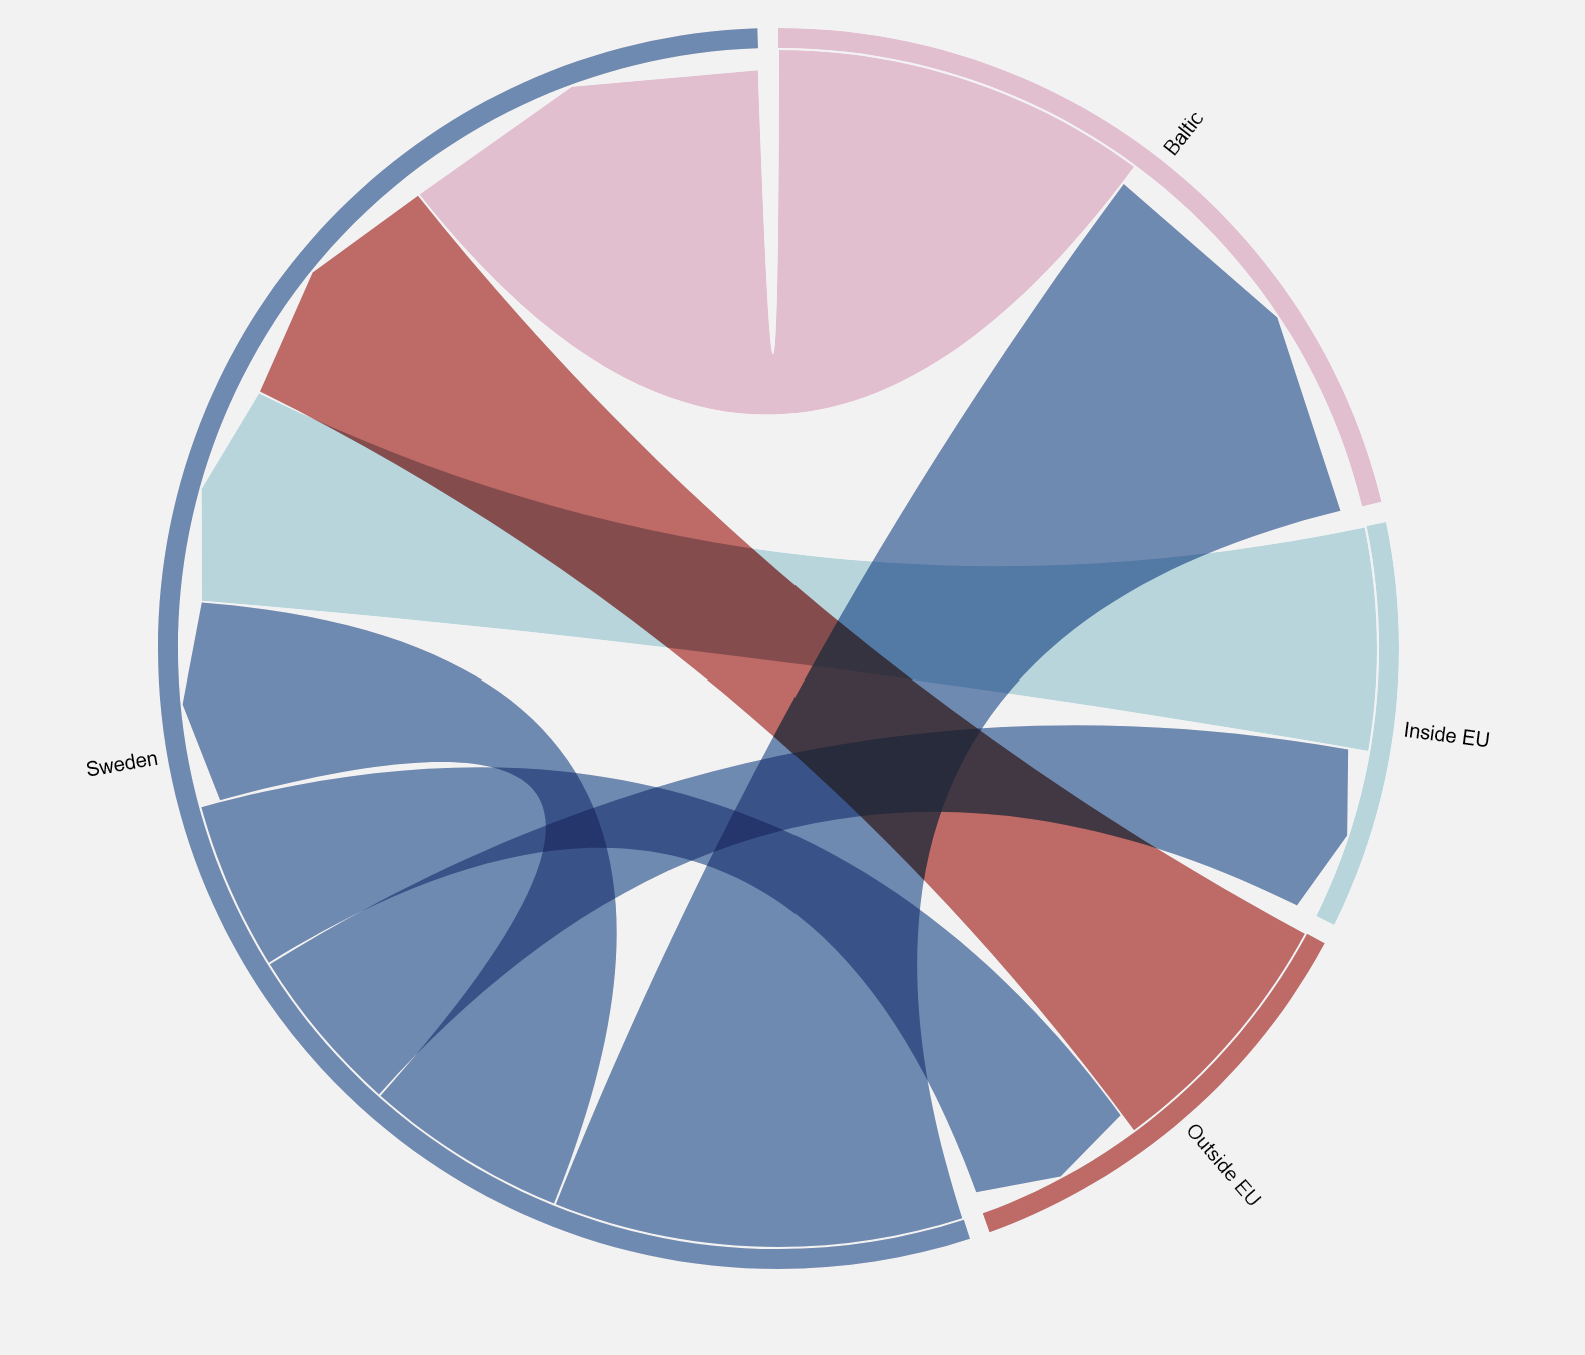